## Лабораторная работа №5 по курсу «Методы искусственного интеллекта»
## «Обработка текстов на естественном языке»

### 1. Лингвистический анализ:
    1.1.  Используя синтаксический анализатор в составе библиотеки natasha, доработать процедуру выделения основ предложений, чтобы она работала и со сложными предложениями (выделяла все основы сложносочиненных и сложноподчиненных предложений).


In [2]:
import natasha
import pymorphy2  # библиотека для морфологического анализа русского языка
                  # является одной из зависимостей natasha
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\User\Downloads\lenta\lenta\lenta-subset.csv")
df.head(5)

,url,title,text,topic,tags,date
0,https://lenta.ru/news/1999/10/04/tv/,Телеканалы станут вещать по единому тарифу,С 1 января 2000 года все телеканалы будут опла...,Экономика,Все,1999/10/04
1,https://lenta.ru/news/1999/10/04/volkswagen/,"Volkswagen выкупает остатки акций ""Шкоды""",Германский автопромышленный концерн Volkswagen...,Экономика,Все,1999/10/04
2,https://lenta.ru/news/1999/10/04/tumen/,Прибыль Тюменнефтегаза возросла в 10 раз,"Нераспределенная прибыль ОАО ""Тюменнефтегаз"", ...",Экономика,Все,1999/10/04
3,https://lenta.ru/news/1999/10/05/sprint/,Крупнейшее в истории слияние компаний происход...,Две крупнейших телекоммуникационных компании С...,Экономика,Все,1999/10/05
4,https://lenta.ru/news/1999/10/05/volga/,ГАЗ получил четверть обещанного кредита,"ОАО ""ГАЗ"" и Нижегородский банк Сбербанка Росси...",Экономика,Все,1999/10/05


**Токенизация**

Последовательность обработки документа с помощью библиотеки natasha строится вокруг концепции документ (класс Doc). Изначально документ представляет собой простой текст, но по мере применения различных алгоритмов лингвистического анализа он "обрастает" новыми деталями, касающимися того или иного аспекта.

In [4]:
doc = natasha.Doc(df.iloc[4].text)

В библиотеке natasha за токенизацию отвечает компонент Segmenter. Создадим экземпляр компонента сегментации и применим его к тексту:

In [5]:
segmenter = natasha.Segmenter()
doc.segment(segmenter)

doc

Doc(text='ОАО "ГАЗ" и Нижегородский банк Сбербанка России п..., tokens=[...], sents=[...])

Мы видим, что поле text документа по-прежнему хранит исходный текст, но помимо него у экземпляра Doc появились свойства tokens и sents, содержащие токены и предложения соответственно:

In [5]:
doc.sents

[DocSent(stop=117, text='ОАО "ГАЗ" и Нижегородский банк Сбербанка России п..., tokens=[...]),
 DocSent(start=118, stop=246, text='Средства предоставляются на 5 месяцев под 45% год..., tokens=[...]),
 DocSent(start=247, stop=348, text='Обеспечением кредита стали акции автозавода, обор..., tokens=[...]),
 DocSent(start=349, stop=546, text='Как заявил на пресс-конференции президент ОАО "ГА..., tokens=[...]),
 DocSent(start=547, stop=619, text='В долларовом эквиваленте размер кредита составляе..., tokens=[...]),
 DocSent(start=620, stop=744, text='Эта сумма предназначена для оплаты производственн..., tokens=[...]),
 DocSent(start=745, stop=853, text='Оборудование было заказано заводом еще до начала ..., tokens=[...]),
 DocSent(start=854, stop=939, text='В целом, отметил Пугин, для развития производства..., tokens=[...]),
 DocSent(start=940, stop=1041, text='В настоящее время ведутся переговоры о предоставл..., tokens=[...]),
 DocSent(start=1042, stop=1250, text='В августе этого года уже бы

In [6]:
doc.tokens[:10]

[DocToken(stop=3, text='ОАО'),
 DocToken(start=4, stop=5, text='"'),
 DocToken(start=5, stop=8, text='ГАЗ'),
 DocToken(start=8, stop=9, text='"'),
 DocToken(start=10, stop=11, text='и'),
 DocToken(start=12, stop=25, text='Нижегородский'),
 DocToken(start=26, stop=30, text='банк'),
 DocToken(start=31, stop=40, text='Сбербанка'),
 DocToken(start=41, stop=47, text='России'),
 DocToken(start=48, stop=57, text='подписали')]

In [7]:
doc.sents[1].tokens

[DocToken(start=118, stop=126, text='Средства'),
 DocToken(start=127, stop=142, text='предоставляются'),
 DocToken(start=143, stop=145, text='на'),
 DocToken(start=146, stop=147, text='5'),
 DocToken(start=148, stop=155, text='месяцев'),
 DocToken(start=156, stop=159, text='под'),
 DocToken(start=160, stop=162, text='45'),
 DocToken(start=162, stop=163, text='%'),
 DocToken(start=164, stop=171, text='годовых'),
 DocToken(start=171, stop=172, text=','),
 DocToken(start=173, stop=179, text='причем'),
 DocToken(start=180, stop=189, text='условиями'),
 DocToken(start=190, stop=198, text='договора'),
 DocToken(start=199, stop=210, text='допускается'),
 DocToken(start=211, stop=220, text='продление'),
 DocToken(start=221, stop=231, text='соглашения'),
 DocToken(start=232, stop=234, text='до'),
 DocToken(start=235, stop=237, text='15'),
 DocToken(start=238, stop=245, text='месяцев'),
 DocToken(start=245, stop=246, text='.')]

In [8]:
[x.text for x in doc.sents[1].tokens]

['Средства',
 'предоставляются',
 'на',
 '5',
 'месяцев',
 'под',
 '45',
 '%',
 'годовых',
 ',',
 'причем',
 'условиями',
 'договора',
 'допускается',
 'продление',
 'соглашения',
 'до',
 '15',
 'месяцев',
 '.']

**Синтаксический разбор**

In [40]:
emb = natasha.NewsEmbedding()
syntax_parser = natasha.NewsSyntaxParser(emb)
doc.parse_syntax(syntax_parser)

In [10]:
doc.sents[1].syntax.print()

          ┌► Средства        nsubj:pass
┌─┌─┌─┌───└─ предоставляются 
│ │ │ │ ┌──► на              case
│ │ │ │ │ ┌► 5               nummod
│ │ │ └►└─└─ месяцев         obl
│ │ │   ┌──► под             case
│ │ │   │ ┌► 45              nummod
│ │ └──►└─└─ %               obl
│ │     └──► годовых         nmod
│ │ ┌──────► ,               punct
│ │ │ ┌────► причем          cc
│ │ │ │ ┌►┌─ условиями       obl
│ │ │ │ │ └► договора        nmod
│ └►└─└─└─┌─ допускается     conj
│     ┌─┌─└► продление       nsubj:pass
│     │ └──► соглашения      nmod
│     │ ┌──► до              case
│     │ │ ┌► 15              nummod
│     └►└─└─ месяцев         nmod
└──────────► .               punct


In [11]:
def extract_basis(syntactic_tree):
    # id2token = {x.id: x for x in syntactic_tree.tokens}
    # Найти главное слово - сказуемое
    root = [x for x in syntactic_tree.tokens if x.rel == 'root'][0]
    # Проверить, есть ли у него какие-то модификаторы (aux)
    aux = [x for x in syntactic_tree.tokens if x.head_id == root.id and (x.rel=='aux' or x.rel=='aux:pass')]
    # Найти подлежащее
    subject = [x for x in syntactic_tree.tokens if x.head_id == root.id and (x.rel == 'nsubj' or x.rel=='nsubj:pass')]
    return subject[0].text, aux[0].text + ' ' + root.text if aux else root.text  

for sent in doc.sents:
    print(extract_basis(sent))

('ОАО', 'подписали')
('Средства', 'предоставляются')
('акции', 'стали')


IndexError: list index out of range

Скорректируем функцию, чтобы она работала и со сложными предложениями (выделяла все основы сложносочиненных и сложноподчиненных предложений). 

Проверять будем на предложениий: **Средства предоставляются на 5 месяцев под 45% годовых, причем условиями договора допускается продление соглашения до 15 месяцев.**      
В данном предложении 2 основы: средство предоставляются и допускается продление. 

In [12]:
def extract_bases(syntactic_tree):
    # выделяем главные слова - сказуемые
    roots = [x for x in syntactic_tree.tokens if x.rel == 'root']
    
    if not roots:
        # обрабатываем исключения, если нет сказуемого
        return None
    
    bases = []
    for root in roots:
        # ищем подлежащее для текущего сказуемого
        subjects = [x for x in syntactic_tree.tokens if x.head_id == root.id and (x.rel == 'nsubj' or x.rel == 'nsubj:pass')]
        if subjects:
            subject = subjects[0]
            
            # поиск вспомогательных слов
            auxiliaries = [x for x in syntactic_tree.tokens if x.head_id == root.id and (x.rel == 'aux' or x.rel == 'aux:pass')]
            aux_text = ' '.join([aux.text for aux in auxiliaries]) if auxiliaries else ''
            
            # добавление найденной основы в список
            bases.append((subject.text, aux_text + ' ' + root.text))
            
            # если есть дополнительные сказуемые в предложении, то добавляем основы в список
            for conj_root in [x for x in syntactic_tree.tokens if x.head_id == root.id and x.rel == 'conj']:
                auxiliaries_conj = [x for x in syntactic_tree.tokens if x.head_id == conj_root.id and (x.rel == 'aux' or x.rel == 'aux:pass')]
                aux_text_conj = ' '.join([aux.text for aux in auxiliaries_conj]) if auxiliaries_conj else ''
                subjects_conj = [x for x in syntactic_tree.tokens if x.head_id == conj_root.id and (x.rel == 'nsubj' or x.rel == 'nsubj:pass')]
                if subjects_conj:
                    subject_conj = subjects_conj[0]
                    bases.append((subject_conj.text, aux_text_conj + ' ' + conj_root.text))
    
    return bases if bases else None

for sent in doc.sents:
    bases = extract_bases(sent.syntax)
    if bases:
        for base in bases:
            print(base)
    else:
        print("Не удалось извлечь основы из предложения.")


('ОАО', ' подписали')
('Средства', ' предоставляются')
('продление', ' допускается')
('акции', ' стали')
Не удалось извлечь основы из предложения.
('размер', ' составляет')
('сумма', ' предназначена')
('Оборудование', 'было заказано')
('рублей', ' требуется')
('переговоры', ' ведутся')
('договоренность', ' должен')
Не удалось извлечь основы из предложения.
('ЕБРР', ' счел')
('Президент', ' заявил')
('кредита', 'будут объединены')


Как мы видим функция правильно выделила основы для предложения: 

 **Средства предоставляются на 5 месяцев под 45% годовых, причем условиями договора допускается продление соглашения до 15 месяцев.**    
('Средства', ' предоставляются') ('продление', ' допускается')

Следовательно, можно сказать, что ее можно использовать для сложных предложений. 

     1.2. Разработать функцию, которая бы выделяла из текста упоминания персоналий. Построить множества персоналий, упоминаемых в новостях Экономики за 2000 и 2015 годы.


In [13]:
from natasha import NamesExtractor, MorphVocab
from collections import defaultdict
from datetime import datetime

Выделим год из даты и отфильтруем нужные строки.

In [14]:
df['year'] = pd.to_datetime(df['date']).dt.year
df_2000 = df[(df['year'] == 2000) & (df['topic'] == 'Экономика')]

In [15]:
df_2000['found_persons'] = None 

morph_vocab = MorphVocab()
extractor = NamesExtractor(morph_vocab)

def extract_persons(text):
    matches = extractor(text)
    return [match.fact.first for match in matches]

for i, row in df_2000.iterrows():
    persons_list = extract_persons(row['text'])
    
    if persons_list:
        df_2000.at[i, 'found_persons'] = persons_list[0]

C:\Users\User\AppData\Local\Temp\ipykernel_6772\2065546801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000['found_persons'] = None


In [16]:
df_personal = pd.DataFrame(df_2000['found_persons'][df_2000['found_persons'].notna()].tolist())

Итак, нам удалось найти множество персоналей в новостях с темой "Экономика" за 2000 год. Теперь сделаем тоже самое и для 2015 года. 

In [17]:
df_2015 = df[(df['year'] == 2015) & (df['topic'] == 'Экономика')]
df_2015['found_persons'] = None 

for i, row in df_2015.iterrows():
    persons_list = extract_persons(row['text'])
    
    if persons_list:
        df_2015.at[i, 'found_persons'] = persons_list[0]

df_personal1 = pd.DataFrame(df_2015['found_persons'][df_2015['found_persons'].notna()].tolist())       

C:\Users\User\AppData\Local\Temp\ipykernel_6772\3878928379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['found_persons'] = None


In [18]:
personal = pd.concat([df_personal, df_personal1], ignore_index=True)
personal = personal.drop_duplicates()

In [19]:
personal

,0
0,Владимир
5,Билл
7,Рем
12,Борис
13,Евгений
...,...
282,Слим
283,Кубе
287,Ингвар
294,Нуриэль


Итак, мы получили список персоналей, которые упомянуты в новостях Экономики за 2000 и 2015 год. 

    1.3. Разработать функцию, которая бы выделяла множество действий, совершенных заданной персоналией («Х поручил то-то, Х предложил то-то, что-то было предложено Х»).

In [20]:
import spacy

In [21]:
def extract_actions(text, person_name):
    try:
        # Разбиваем текст на предложения
        doc = natasha.Doc(text)
        doc.segment(segmenter)
        doc.parse_syntax(syntax_parser)
        
        actions = set()

        # Проходимся по каждому предложению
        for sent in doc.sents:
            # Ищем главное слово в предложении (например, подлежащее)
            main_word = next((token.text.lower() for token in sent.tokens if token.rel == 'nsubj'), None)

            # Если главное слово есть и оно совпадает с именем персоны
            if main_word and main_word == person_name.lower():
                root_tokens = [token.text for token in sent.tokens if token.rel == 'root']
                noun_tokens = [token.text for token in sent.tokens if (token.rel == 'obj' or token.rel == 'obj:pass')]

                root = root_tokens[0] if root_tokens else ''
                noun = ' '.join(noun_tokens) if noun_tokens else ''

                action = f"{main_word} {root} {noun}".strip()
                actions.add(action)

        return actions

    except Exception as e:
        print(f"Error processing text: {e}")
        return set()

Для примера посмотрим на 1 персональ и посмотрим, какие действия он совершал из 50 первых новостей о Экономики за 2000 год

In [22]:
for _, row in personal[:1].iterrows():
    person_name = row[0]
    print(row[0])
    # Проходим по каждой новости в датафрейме с новостями
    for _, news_row in df_2000[:50].iterrows():
        text = news_row['text']

        # Извлекаем подлежащее, вспомогательный глагол, глагол и существительное, относящиеся к глаголу, для данной персоны и новости
        actions = extract_actions(text, person_name)

        # Выводим результат
        if actions:
            print("Новость:")
            print(news_row['text'])
            print("Действие персоналя:")
            print('\n'.join(actions))    

Владимир
Новость:
С 1 февраля пенсии будут повышены не на 12, а на 20 процентов. Об этомсообщил журналистам РИА "Новости" исполняющий обязанности президента России, премьер-министр Владимир Путин в ходе встречи с председателем Пенсионного фонда Михаилом Зурабовым. 11 января 2000 Владимир Путин подписал постановление правительства об увеличении с 1 февраля размера пенсий на 20 процентов. По мнению главы Пенсионного фонда, такое повышение пенсий стало возможным в результате роста производства в стране. По словам Зурабова, в феврале средняя пенсия составит примерно 650 рублей. Все выплаты Пенсионный фонд намерен производить в срок. Кроме того, предполагается, что в 2000 году пенсии будут регулярно повышаться. Для таких надежд, убежден глава Пенсионного фонда, есть все основания. На встрече исполняющего обязанности президента с руководителем Пенсионного фонда также обсуждались вопросы адресной помощи наименее обеспеченным пенсионерам, в том числе живущим на Крайнем Севере и Дальнем Востоке

Возможно в этом задании нужно больше субъектов, но в целом данный результат подходит по требующийся шаблон. 

### 2. Векторная модель документа:
    2.1.  Провести анализ того, как качество тематической классификации новости без лемматизации зависит от размера обучающего множества (см. кривые обучения в зависимости от размера обучающего множества). Сопоставить c качеством классификации модели с лемматизацией.


**Оценка качества модели без лемматизации**

In [6]:
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import make_pipeline

Так как качество тематической классификации новости без лемматизации зависит от обучающего множества по разным топикам и сравним их с помощью кривых обучения. 

In [24]:
df.groupby(by='topic').count()

,url,title,text,tags,date,year
topic,,,,,,
Культура,53797,53797,53796,53531,53797,53797
Спорт,64413,64413,64413,57894,64413,64413
Экономика,79528,79528,79528,76423,79528,79528


Самой крупной выборкой будет топик "Экономика", а самым маленьки "Культура"

In [7]:
df_economy = df
df_culture = df
df_sport = df

In [8]:
df_economy['target'] = (df_economy['topic'] == 'Экономика').astype(np.int8)
df_economy = df_economy[['text', 'target']]

df_culture['target'] = (df_culture['topic'] == 'Культура').astype(np.int8)
df_culture = df_culture[['text', 'target']]

df_sport['target'] = (df_sport['topic'] == 'Спорт').astype(np.int8)
df_sport = df_sport[['text', 'target']]

In [27]:
df_economy

,text,target
0,С 1 января 2000 года все телеканалы будут опла...,1
1,Германский автопромышленный концерн Volkswagen...,1
2,"Нераспределенная прибыль ОАО ""Тюменнефтегаз"", ...",1
3,Две крупнейших телекоммуникационных компании С...,1
4,"ОАО ""ГАЗ"" и Нижегородский банк Сбербанка Росси...",1
...,...,...
197733,Российский боец смешанного стиля (MMA) Алексей...,0
197734,Американский боец смешанного стиля (MMA) Фрэн...,0
197735,Главный тренер «Манчестер Юнайтед» Жозе Моурин...,0
197736,"Президент России Владимир Путин, выступая на з...",0


In [28]:
df_culture

,text,target
0,С 1 января 2000 года все телеканалы будут опла...,0
1,Германский автопромышленный концерн Volkswagen...,0
2,"Нераспределенная прибыль ОАО ""Тюменнефтегаз"", ...",0
3,Две крупнейших телекоммуникационных компании С...,0
4,"ОАО ""ГАЗ"" и Нижегородский банк Сбербанка Росси...",0
...,...,...
197733,Российский боец смешанного стиля (MMA) Алексей...,0
197734,Американский боец смешанного стиля (MMA) Фрэн...,0
197735,Главный тренер «Манчестер Юнайтед» Жозе Моурин...,0
197736,"Президент России Владимир Путин, выступая на з...",1


In [29]:
df_sport

,text,target
0,С 1 января 2000 года все телеканалы будут опла...,0
1,Германский автопромышленный концерн Volkswagen...,0
2,"Нераспределенная прибыль ОАО ""Тюменнефтегаз"", ...",0
3,Две крупнейших телекоммуникационных компании С...,0
4,"ОАО ""ГАЗ"" и Нижегородский банк Сбербанка Росси...",0
...,...,...
197733,Российский боец смешанного стиля (MMA) Алексей...,1
197734,Американский боец смешанного стиля (MMA) Фрэн...,1
197735,Главный тренер «Манчестер Юнайтед» Жозе Моурин...,1
197736,"Президент России Владимир Путин, выступая на з...",0


In [9]:
df_economy.dropna(inplace=True)
df_culture.dropna(inplace=True)
df_sport.dropna(inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_4676\771044405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_economy.dropna(inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_4676\771044405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_culture.dropna(inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_4676\771044405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sport.dropna(inplace=True)


In [10]:
vectorizer = CountVectorizer(
    max_df=0.7,    # Делать признаками слова, которые содержатся в не более, чем заданной доле документов
    min_df=10      # Делать признаки из слов, которые содержатся, по крайней мере, в заданном количестве документов
)

In [11]:
X_economy = vectorizer.fit_transform(df_economy.text)

In [12]:
X_economy_train, X_economy_test, y_economy_train, y_economy_test = train_test_split(X_economy, df_economy.target, test_size=0.2, random_state=42, stratify=df_economy.target)

In [13]:
lm_economy = LogisticRegression()
lm_economy.fit(X_economy_train, y_economy_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
print('Accuracy:', accuracy_score(y_economy_test, lm_economy.predict(X_economy_test)))
print('ROC_AUC:', roc_auc_score(y_economy_test, lm_economy.predict_proba(X_economy_test)[:, 1]))

Accuracy: 0.9942095681197533
ROC_AUC: 0.9996068418114106


In [15]:
X_culture = vectorizer.fit_transform(df_culture.text)
X_culture_train, X_culture_test, y_culture_train, y_culture_test = train_test_split(X_culture, df_culture.target, test_size=0.2, random_state=42, stratify=df_culture.target)

lm__culture = LogisticRegression()
lm__culture.fit(X_culture_train, y_culture_train)

print('Accuracy:', accuracy_score(y_economy_test, lm__culture.predict(X_culture_test)))
print('ROC_AUC:', roc_auc_score(y_economy_test, lm__culture.predict_proba(X_culture_test)[:, 1]))

Accuracy: 0.545666026094872
ROC_AUC: 0.5013400344803405


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
X_sport = vectorizer.fit_transform(df_sport.text)
X_sport_train, X_sport_test, y_sport_train, y_sport_test = train_test_split(X_sport, df_sport.target, test_size=0.2, random_state=42, stratify=df_sport.target)

lm_sport = LogisticRegression()
lm_sport.fit(X_sport_train, y_sport_train)

print('Accuracy:', accuracy_score(y_sport_test, lm_sport.predict(X_sport_test)))
print('ROC_AUC:', roc_auc_score(y_sport_test, lm_sport.predict_proba(X_sport_test)[:, 1]))

Accuracy: 0.9960301405886518
ROC_AUC: 0.9998110618931458


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Теперь сравним результаты на кривые обучения на разных выборках

In [17]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [18]:
train_sizes_economy, train_scores_economy, test_scores_economy = learning_curve(lm_economy, X_economy_train, y_economy_train, cv=5, scoring='accuracy')

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [19]:
train_sizes_culture, train_scores_culture, test_scores_culture = learning_curve(lm__culture, X_culture_train, y_culture_train, cv=5, scoring='accuracy')

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [20]:
train_sizes_sport, train_scores_sport, test_scores_sport = learning_curve(lm_sport, X_sport_train, y_sport_train, cv=5, scoring='accuracy')

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

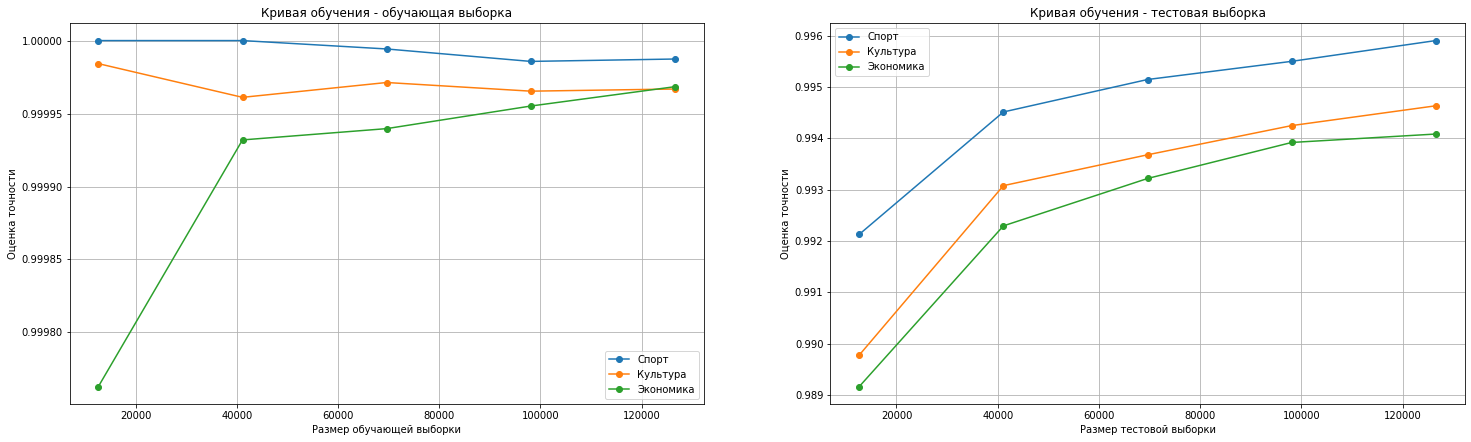

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(25, 7))

axes[0].plot(train_sizes_sport, np.mean(train_scores_sport, axis=1), label='Спорт', marker='o')
axes[0].plot(train_sizes_culture, np.mean(train_scores_culture, axis=1), label='Культура', marker='o')
axes[0].plot(train_sizes_economy, np.mean(train_scores_economy, axis=1), label='Экономика', marker='o')

axes[0].set_title('Кривая обучения - обучающая выборка')
axes[0].set_xlabel('Размер обучающей выборки')
axes[0].set_ylabel('Оценка точности')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(train_sizes_sport, np.mean(test_scores_sport, axis=1), label='Спорт', marker='o')
axes[1].plot(train_sizes_culture, np.mean(test_scores_culture, axis=1), label='Культура', marker='o')
axes[1].plot(train_sizes_economy, np.mean(test_scores_economy, axis=1), label='Экономика', marker='o')

axes[1].set_title('Кривая обучения - тестовая выборка')
axes[1].set_xlabel('Размер тестовой выборки')
axes[1].set_ylabel('Оценка точности')
axes[1].legend()
axes[1].grid(True)

plt.show()

In [28]:
# удаляю некоторые переменные, чтобы освободить память
del X_sport
del X_culture
del y_culture_test
del y_culture_train
del y_sport_test
del y_sport_train

**топика "Экономика":**
На тестовой выборке график быстро возрастает вверх, а также он схож с обучающей выборки. И можно сказать, что выборка хорошо подобрана. 

**топика "Культура":**
На тестовой выборке график достаточно быстро растет, но он сильно отличается от обучающей выборки, можно предположить, что происходит переобучение модели, поэтому стоит выбрать выборку больше.

**топика "Спорт":**
На тестовой выборке график достаточно быстро растет, но на обучающей выборке график даже уходит вниз, что тоже является показателем плохой выборки.

Для дальнейшей работы выбирим топик "Экономика" и сделаем модель с лемматизацей для сравнения. 

**Лемматизация**

In [29]:
df_economy_lem = df
df_economy_lem['target'] = (df_economy_lem['topic'] == 'Экономика').astype(np.int8)
df_economy_lem = df_economy_lem[['text', 'target']]

df_economy_lem.dropna(inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_4676\1210847414.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_economy_lem.dropna(inplace=True)


In [30]:
X_economy_lem = vectorizer.fit_transform(df_economy_lem.text)

In [31]:
scaler = StandardScaler(with_mean=False)
pipeline = make_pipeline(vectorizer, scaler)

In [32]:
X_lem = pipeline.fit_transform(df_economy_lem.text)

In [33]:
X_economy_lem_train, X_economy_lem_test, y_economy_lem_train, y_economy_lem_test = train_test_split(X_lem, df_economy_lem.target, test_size=0.2, random_state=42, stratify=df_economy_lem.target)

In [34]:
lm_economy_lem = LogisticRegression()
lm_economy_lem.fit(X_economy_lem_train, y_economy_lem_train)

print('Accuracy:', accuracy_score(y_economy_lem_test, lm_economy_lem.predict(X_economy_lem_test)))
print('ROC_AUC:', roc_auc_score(y_economy_lem_test, lm_economy_lem.predict_proba(X_economy_lem_test)[:, 1]))

Accuracy: 0.9929452816830181
ROC_AUC: 0.9992687375229908


In [35]:
train_sizes_economy_lem, train_scores_economy_lem, test_scores_economy_lem = learning_curve(lm_economy_lem, X_economy_lem_train, y_economy_lem_train, cv=5, scoring='accuracy')

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


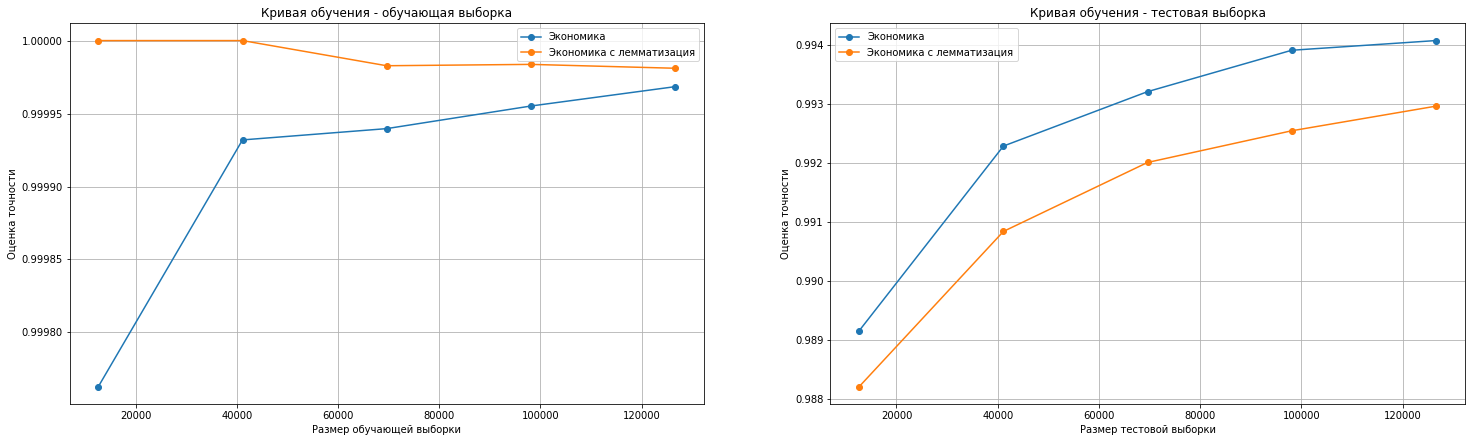

In [36]:
fig, axes1 = plt.subplots(1, 2, figsize=(25, 7))

axes1[0].plot(train_sizes_economy, np.mean(train_scores_economy, axis=1), label='Экономика', marker='o')
axes1[0].plot(train_sizes_economy_lem, np.mean(train_scores_economy_lem, axis=1), label='Экономика с лемматизация', marker='o')

axes1[0].set_title('Кривая обучения - обучающая выборка')
axes1[0].set_xlabel('Размер обучающей выборки')
axes1[0].set_ylabel('Оценка точности')
axes1[0].legend()
axes1[0].grid(True)

axes1[1].plot(train_sizes_economy, np.mean(test_scores_economy, axis=1), label='Экономика', marker='o')
axes1[1].plot(train_sizes_economy_lem, np.mean(test_scores_economy_lem, axis=1), label='Экономика с лемматизация', marker='o')

axes1[1].set_title('Кривая обучения - тестовая выборка')
axes1[1].set_xlabel('Размер тестовой выборки')
axes1[1].set_ylabel('Оценка точности')
axes1[1].legend()
axes1[1].grid(True)

**Результаты экономики без лемматизации**

     Accuracy: 0.9942095681197533
     ROC_AUC: 0.9996068418114106

**Результаты экономики с лемматизации**

      Accuracy: 0.9929452816830181
      ROC_AUC: 0.9992687375229908

После лемматизации точность (accuracy) уменьшилась, как и  ROC AUC. На графике также видно, что модели ухудшилась. 
Можно предположить, что из-за приведения слов к нормальному виду они потеряли свое значение, которое могло быть важно для модели  


### 3. Вложения (эмбеддинги) слов:
    3.1. Загрузить модель эмбеддингов слов, обученную на художественной литературе (см. https://github.com/natasha/navec). Для выбранного набора слов сопоставить схожие слова(расположенные рядом в пространстве вложения) и рассуждение по аналогии. Есть ли разница с моделью вложений, обученной на новостных сообщениях?

Выдвиним гипотезу для сравнения модели эмбеддингов слов, обученную на художественной литературе, и модели,обученной на новостных сообщениях.

Попробуем использовать эмбеддинги для поиска близких по значению слов (нужно помнить, что это не синонимы в полной мере) и для рассуждения по аналогии. Для этого реализуем пару функций, осуществляющих поиск слов, ближайших к заданному вектору:

In [37]:
import heapq

def euclidean_distance(x, y):
    return np.linalg.norm(x - y)

def cosine_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

def find_closest_words(emb, words, k=5, similarity=cosine_similarity):
    """Поиск k ближайших слов для каждого слова из списка."""
    result = {}
    for word in words:
        word_vector = emb[word]
        word_distances = [(-similarity(emb[other_word], word_vector), other_word) for other_word in emb.vocab.words]
        closest_words = heapq.nsmallest(k, word_distances)
        result[word] = [w for (_, w) in closest_words]
    return result


Теперь попробуем дать на вход нашей модели вложений пример слов и посмотрим, какие слова она предоставит в качестве схожих. 

In [38]:
example_words = ['выборы', 'блок', 'закон', 'фигура', 'событие']

In [41]:
closest_words_dict = find_closest_words(emb, example_words, k=5, similarity=cosine_similarity)

# Вывод ближайших слов для каждого из примеров
for word, closest_words in closest_words_dict.items():
    print(f"Ближайшие слова для'{word}': {closest_words}")


C:\Users\User\AppData\Local\Temp\ipykernel_4676\1431814167.py:7: RuntimeWarning: invalid value encountered in float_scalars
  return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))


Ближайшие слова для'выборы': ['выборы', 'президентские', 'выборов', 'выборах', 'досрочные']
Ближайшие слова для'блок': ['блок', 'блока', 'оппозиционный', 'бпп', 'разгонный']
Ближайшие слова для'закон': ['закон', 'законопроект', 'закона', 'чтении', 'принятый']
Ближайшие слова для'фигура': ['фигура', 'знаковая', 'фигурой', 'культовая', 'заметная']
Ближайшие слова для'событие': ['событие', 'знаковое', 'событием', 'знаменательное', 'важное']


Библиотека natasha предоставляет специальный класс NavecEmbedding, совместимый с фреймворком PyTorch (т.е., реализующий torch.nn.Module), и предназначенный для перевода номеров слов в вектора эмбеддингов в рамках нейронных сетей, созданных с помощью этого фреймворка. Проверим какие схожие слова данная модель подберет для нашего набора слов

In [42]:
import torch
from slovnet.model.emb import NavecEmbedding
from navec import Navec

In [43]:
navec = Navec.load(r'C:\Users\User\Downloads\navec_hudlit_v1_12B_500K_300d_100q.tar')

In [44]:
emb_layer = NavecEmbedding(emb)

c:\Python310\lib\site-packages\slovnet\model\emb.py:46: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:212.)
  torch.from_numpy(navec.pq.indexes),


In [45]:
input = torch.tensor([1, 2, 3])
emb_layer(input).shape

torch.Size([3, 300])

In [46]:
def find_similar_words(word, navec, topn=5):
    word_vector = navec[word]
    similar_words = []

    for other_word in navec.vocab.words:
        if other_word != word:
            other_vector = navec[other_word]
            similarity = np.dot(word_vector, other_vector) / (np.linalg.norm(word_vector) * np.linalg.norm(other_vector))
            similar_words.append((other_word, similarity))

    similar_words = sorted(similar_words, key=lambda x: x[1], reverse=True)

    top_similar_words = similar_words[:topn]
    return top_similar_words


In [47]:
for search_word in example_words:
    similar_words = find_similar_words(search_word, navec, topn=5)
    print(f"\nБлижайшие слова для '{search_word}':", end=' ')
    for word, similarity in similar_words:
        print(f"{word}", end=', ')
    print() 

C:\Users\User\AppData\Local\Temp\ipykernel_4676\4233101760.py:8: RuntimeWarning: invalid value encountered in float_scalars
  similarity = np.dot(word_vector, other_vector) / (np.linalg.norm(word_vector) * np.linalg.norm(other_vector))



Ближайшие слова для 'выборы': выборов, президентские, выборах, парламентские, выборами, 

Ближайшие слова для 'блок': блока, блоке, блоком, блоку, модуль, 

Ближайшие слова для 'закон': закона, законы, закону, законом, принцип, 

Ближайшие слова для 'фигура': фигурка, фигуру, силуэт, стройная, темная, 

Ближайшие слова для 'событие': происшествие, знаменательное, событием, события, случившееся, 


Действительно, слова подбирается по разному смыслу. 

Для слова "блок" в "новостоном" контексте побирается слова "бпп, оппозиционный", что больше относится к политике. А вот в "литературном" контексте такого смысла нет и модель подбирает схожие слова в значение оконченного смыслового контекста, как слово "модуль", например, которое можно отнести к завершению обучающего модуля.

Аналогичное можно сказать и про слово "закон", так как в новостях она чаще несет смысл какого-то законопроекта, поэтому и подобранны слова "законопроект, чтение, принятие". В литературе же чаще всего это слово может нести значение каких-то законов, которых придерживается человек. Это хорошо видно из подобранного слова "принцип".

Слово "фигура" тоже имеет разный смысл в этих двух контекстах: в литературе - строение человека, силуэт, в новостях - какой-то человек, популярная личность 

А вот слова "выбор" и "событие" схожие в данных контекстах. Но все же мне кажется, что в новостях выборы имеют смысл выбора в призеденты/парламент и т.д., а вот в литературе - выбор перед человеком, но слова подобранны не совсем точно. А вот событие имеет смысл происшествия в обоих контекстах.




### 4. Нейросетевая обработка текстов:
    4.1. Тематический классификатор новостей на основе LSTM демонстрирует очень высокое качество классификации буквально с первой эпохи обучения. Но является ли это «заслугой» LSTM или качественного набора эмбеддингов? Реализуйте простейший классификатор сообщений, в котором на вход полносвязному слою передается просто среднее арифметическое эмбеддингов слов. Сопоставьте качество классификации с моделью на основе LSTM.

In [48]:
import torch.nn as nn
import torch 
from natasha import Segmenter

Для этого возьмем наш готовый датафрейм df_economy

In [49]:
class SmartTokenizer:
    """Класс для выделения токенов.
    
    Использует библиотеку natasha для токенизации и лемматизации,
    оставляет только существительные и глаголы."""
    
    def __init__(self):
        emb = natasha.NewsEmbedding()
        self.segmenter = natasha.Segmenter()
        self.morph_tagger = natasha.NewsMorphTagger(emb)
        self.morph_vocab = natasha.MorphVocab()
    
    def __call__(self, text):
        doc = natasha.Doc(text)
        doc.segment(self.segmenter)
        doc.tag_morph(self.morph_tagger)
        tokens = []
        for token in doc.tokens:
            if token.pos in ['NOUN', 'VERB']:
                token.lemmatize(morph_vocab)
                tokens.append(token.lemma)
        return tokens

improved_vectorizer = CountVectorizer(
    tokenizer=SmartTokenizer(),
    token_pattern=None,
    max_df=0.7,    # Делать признаками слова, которые содержатся в не более, чем заданной доле документов
    min_df=10      # Делать признаки из слов, которые содержатся, по крайней мере, в заданном количестве документов
)

morph_vocab = natasha.MorphVocab()

In [50]:
df_test = df_economy[:1000].copy()
df_train = df_economy[1000:].copy().reset_index(drop=True)

In [51]:
emb = natasha.NewsEmbedding()
segmenter = Segmenter()

def text_to_ids(emb, text: str, length: int) -> torch.tensor:
    """Преобразование строки в тензор с номерами токенов."""
    # Пунктуационные токены (их кодировать не будем)
    punct = [',', '.', ';', ':', '-', '...', '!', '?']
    # Проведем токенизацию текста
    d = natasha.Doc(text)
    d.segment(segmenter)
    # Для каждого токена, который найдется в словаре эмбеддингов подставим
    # его номер, для прочих подставим номер <unk>
    tmp = torch.tensor([emb.vocab.get(x.text.lower(), emb.vocab.unk_id)
                       for x in d.tokens
                       if x.text not in punct][:length])
    # Дополним последовательность (спереди) токенами <pad>
    return torch.nn.functional.pad(tmp, (length - len(tmp), 0), "constant", emb.vocab.pad_id)

In [52]:
X = torch.stack([text_to_ids(emb, x, 50) for x in df_economy.text], 0)
y = torch.unsqueeze(torch.tensor(df_economy.target, dtype=torch.float32), 1)

In [53]:
X_test = torch.stack([text_to_ids(emb, x, 50) for x in df_test.text], 0)
y_test = torch.unsqueeze(torch.tensor(df_test.target, dtype=torch.float32), 1)

In [54]:
data_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X, y), batch_size=8)
test_data_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_test, y_test), batch_size=16, shuffle=False)

In [55]:
class SimpleLSTMClassifier(nn.Module):
    """Простой классификатор текста."""
    
    def __init__(self):
        super().__init__()
        # Специальная обёртка, позволяющая использовать
        # эмбеддинги natasha как слой сети PyTorch
        self.embedding = NavecEmbedding(emb)
        # LSTM-слой.
        # Обратите внимание на batch_first=True !
        # По умолчанию этот параметр равен False и первая размерность
        # интерпретируется как длина последовательности, а не батча - 
        # если это не поменять, то сеть будет учиться на "каше" из данных
        self.lstm = nn.LSTM(300,   # размерность элемента последовательности (эмбеддинга)
                            30,    # выходная размерность
                            batch_first=True)
        self.fc = nn.Linear(30, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        # Используйте размерность 1, чтобы выбрать последний временной шаг
        x = x[:, -1, :]
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

In [56]:
model = SimpleLSTMClassifier()

Обученим модель и посмотрим результаты тестов 

In [57]:
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), 1e-3)

for epoch in range(5):
    model.train()
    for X, y in data_loader:
        optimizer.zero_grad()
        pred_logits = model(X)
        loss = criterion(pred_logits, y)
        loss.backward()
        optimizer.step()
    model.eval()
    preds = []
    with torch.no_grad():
        for X, y in test_data_loader:
            pred_logits = model(X)
            preds.append(torch.sigmoid(pred_logits))
    preds = torch.cat(preds)
    print(f'Epoch {epoch}: train loss={loss.detach().item():.4f}. ' \
          f'Test accuracy {accuracy_score(df_test.target, preds.numpy() > 0.5):.4f} ' \
          f'ROC_AUC {roc_auc_score(df_test.target, preds.numpy()):.4f}')

Epoch 0: train loss=0.6932. Test accuracy 0.9000 ROC_AUC 0.9945
Epoch 1: train loss=0.6932. Test accuracy 0.9000 ROC_AUC 0.9960
Epoch 2: train loss=0.6931. Test accuracy 0.9030 ROC_AUC 0.9979
Epoch 3: train loss=0.6931. Test accuracy 0.9400 ROC_AUC 0.9986
Epoch 4: train loss=0.6931. Test accuracy 0.9840 ROC_AUC 0.9975


Напомним, что результат качественного набора для набора с топиком "Экономика"

    Accuracy: 0.9942095681197533
    ROC_AUC: 0.9996068418114106

Обе модели показывают высокую точность и хороший показатель ROC-AUC, что свидетельствует о хорошей способности моделей разделять классы. Векторная модель достигает более высоких значений метрик. Похоже, что векторная модель в данном случае лучше справляется с задачей классификации на выбранном наборе. 

Высокое качество классификации,  является результатом успешного сочетания обоих факторов: эффективной архитектуры LSTM и качественных эмбеддингов natasha.NewsEmbedding

     4.2. Проведите анализ ошибок – найдите новости, на которых модель ошибается, и предложите разумные объяснения этому.

Для этого запустим модель на тестовой выборке и определим новости, в которых модель ошибается 

In [58]:
model.eval()
all_preds = []
with torch.no_grad():
    for X, y in test_data_loader:
        pred_logits = model(X)
        preds = torch.sigmoid(pred_logits)
        all_preds.append(preds)

all_preds = torch.cat(all_preds)

df_test['predicted'] = (all_preds.numpy() > 0.5).astype(int)

errors_df = df_test[df_test['target'] != df_test['predicted']]

In [59]:
pd.set_option('display.max_colwidth', None)

In [60]:
errors_df

,text,target,predicted
324,"В пятницу в торжественной обстановке состоялось открытие последнего участка южной скоростной трассы, связывающей Вену с Италией и Словенией. Этот автобан длиной 370 километров строился более 40 лет. Среди причин столь длительного срока проведения строительных и автодорожных работ - недостатки финансирования и технические сложности, поскольку автобан проходит по участкам Альпийских гор. Не последнее место в этом списке занимают и трудности, связанные с региональными властями, так как трасса проходит по территории нескольких федеральных земель - Нижней Австрии, Бургенланда, Штирии, Каринтии и Вены, а каждая земля имеет свой бюджет и свое дорожное законодательство, сообщает агентство РИА ""Новости"".",1,0
519,"Концерны Time Warner и EMI Group PLC объединяют свои подразделения звукозаписи в корпорацию Warner EMI Music. Эта корпорация займет одно из первых мест на мировом музыкальном рынке. Она будет владеть правами на распространение альбомов таких звезд, как Мадонна, Spice Girls, Metallica, REM и других, вплоть до легендарных теперь уже записей Beatles. При оценке стоимости сделки называются разные суммы - от 7,5 до 20 миллиардов долларов, сообщает информационная служба ВВС. Как сообщает агентство Associated Press, обе компании будут в равной степени контролировать новое объединение, владея 50 процентами акций фирмы. Ожидается, что официальное объявление о создании нового гиганта звукозаписи состоится 24 января в Лондоне. Напомним, что две недели назад было объявлено о слиянии Time Warner и корпорации America Online, которая лидирует в области услуг доступа в Интернет. Судя по всему, теперь коммерческое распространение звукозаписей будет осуществляться через глобальную компьютерную сеть.",1,0
668,"Во втором круге проходящего в голландском Роттердаме мужского турнира ATP с призовым фондом 850 тысяч долларов россиянин Евгений Кафельников победил француза Николя Эскюде - 6:3, 6:3. Если главный фаворит турнира в Роттердаме - Кафельников - практически не имел проблем в этой встрече, то немец Николас Кифер в поединке того же круга с чехом Иржи Новаком столкнулся с рядом трудностей. Тем не менее, матч завершился в пользу Кифера со счетом 5:7, 6:2, 7:6, 7:3. В еще одной встрече француз Жером Гольмар нанес поражение голландцу Яну Симеринку - 6:4, 7:6, 7:4.",0,1
676,"Футбольная лига Азербайджана в понедельник была дисквалифицирована на неопределенный срок. Столь суровая санкция стала следствием скандала, произошедшего накануне, когда 11 из 12 футбольных клубов страны отказались играть (национальный чемпионат должен был возобновиться после зимней паузы). Между тем представители этих клубов еще на прошлой неделе заявили, что они не будут принимать участия ни в кубковых играх, ни в матчах чемпионата до тех пор, пока не разрешатся их разногласия с руководством азербайджанской Федерации футбола. Лишь одна команда (занимающая 9-е место) была готова выйти на поле, но встреча так и не состоялась по причине неявки соперника. Напомним, что в начале февраля Азербайджан лишь в самую последнюю минуту избежал дисквалификации ФИФА, пообещав мирно уладить вышеупомянутый конфликт. Но, как видно, этого не произошло. Представители клубов отказываются участвовать в чемпионате до перевыборов руководителя национальной федерации (нынешний ее глава Фуад Мусаев их категорически не устраивает), которые пройдут в начале апреля. Начало сезона, кстати, также было скомкано - в первом круге первенства команды сыграли только 7 туров.",0,1
684,"В центральном матче второго круга чемпионата ""Манчестер Юнайтед"" сумел добиться победы на поле своего основного конкурента ""Лидса"", и увеличил отрыв от преследователя до 6 очков. В составе манкунианцев отличился Энди Коул, который забил свой 16-й гол в чемпионате. ""Манчестер"" одержал победу без одного из своих лидеров Дэвида Бекхэма, которого накануне главный тренер команды Алекс Фергюсон не пустил на тренировочную базу за пропуск предыдущей тренировки. До конца встречи не доиграл еще один игрок ""

Можно предположить, что модель ошиблась в этих строках из-за: 
  - **Неоднозначное значение текста.** Здесь, я подоразумеваю, что текст многогранный иможно отнести его к нескольким типам, как в строке 324. Мне кажется, что данную строку можно отнести и к новостяи про спорт, поэтому модель ошибилась.
  - **Отсутствие/присутвие явных ключевых слов.** Например, в строке 932 есть ключевые слова, которые можно отнести к экономике "продажу","стоимость", "сумма", "546 тысяч". Мне кажетс модель могла ошибиться именно из-за большего количество слов, которые относятся к экономике 

    4.3.Усовершенствуйте классификатор, чтобы он осуществлял многоклассовую классификацию (классы «Культура», «Спорт», «Экономика»). Подсказка: скорректируйте размерность выходного слоя, используйте torch.nn.CrossEntropyLoss при обучении и torch.nn.Softmax при формировании предсказаний.

    Задание решено в другом блокноте